In [17]:
import scipy.io as io
import numpy as np

y=io.loadmat("D:\\机器学习前沿实验\\实验课一\\dataset\\FTD_90_200_fMRI.mat")

# 为数组打上标签 
#NC=0
#OCD=1

In [18]:
FTD=np.asarray(y['FTD'])
FTD_lable=np.full((FTD.shape[0],1),0,dtype=int)

# 记录数组维度方便后续转化

In [19]:
m=FTD.shape[1]
n=FTD.shape[2]

In [20]:
NC=np.asarray(y['NC'])
NC_lable=np.full((NC.shape[0],1),1,dtype=int)

In [21]:
x = FTD.reshape(FTD.shape[0],-1)
y = NC.reshape(NC.shape[0],-1)

# 将数据转换为2维，方便后续数据划分

In [22]:
Label=np.vstack((FTD_lable,NC_lable))
Data=np.vstack((x,y))

# 将数据合并

In [23]:
Data=(Data.reshape(-1,m, n))
Data=Data.transpose((0,2,1))
from tensorflow.keras.utils import to_categorical
Label=to_categorical(Label)

In [24]:
#label_train,label_test

# 将数据转换为原本的维度

In [25]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import backend as K
import keras
from keras import regularizers
from collections import Counter
from sklearn.metrics import confusion_matrix

In [42]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM
from keras.layers.core import Dense, Activation, Dropout,Flatten
import keras.backend as K
from keras.callbacks import LearningRateScheduler

def scheduler(epoch):
    # 每隔5个epoch，学习率减小为原来的1/10-lstm
    #if epoch % 5 == 0 and epoch != 0:
    if epoch % 10 == 0 and epoch != 0:
        #lr = K.get_value(model.optimizer.lr*0.001)#LSTM
        lr = K.get_value(model.optimizer.lr*10) #一维卷积
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)

In [27]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import backend as K
import keras
from keras import regularizers
from collections import Counter
from sklearn.metrics import confusion_matrix

In [28]:
K.clear_session()
def build_model(dropout_rate=0.25,activation='relu'):
    start_neurons = 512
    # create model
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(start_neurons, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//2,activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//4,activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//8,activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate/2))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer = 'rmsprop',                 # 加速神经网络
        loss = 'categorical_crossentropy',   # 损失函数
        metrics = ['accuracy'], )
    return model

In [29]:
model_1=build_model()
model_1(x[1:10])

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[3.3626696e-03, 9.9663734e-01],
       [2.3052807e-01, 7.6947188e-01],
       [1.7773124e-04, 9.9982232e-01],
       [1.7429227e-01, 8.2570767e-01],
       [4.7087759e-02, 9.5291221e-01],
       [7.8723043e-01, 2.1276960e-01],
       [8.2263404e-01, 1.7736603e-01],
       [2.1529871e-01, 7.8470135e-01],
       [7.9408157e-01, 2.0591836e-01]], dtype=float32)>

In [43]:
from sklearn.model_selection import KFold 
from sklearn import metrics

kf = KFold(n_splits=5, shuffle=True,random_state=42) # 5折交叉验证

i = 1
a=[]
h=np.asarray(Data)
Label=np.asarray(Label)
for train_index, test_index in kf.split(h, Label):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = h[train_index], h[test_index] 
    y_train, y_test = Label[train_index], Label[test_index]
    model=build_model()
    history=model.fit(X_train,y_train,batch_size=10,epochs=200,validation_data=(X_test,y_test),callbacks=[reduce_lr])
    x=np.asarray(history.history['accuracy']), 
    y=np.asarray(history.history['val_accuracy'])
    b=np.asarray(y)
    a.append(b.max())
    i += 1


1 of kfold 5
lr changed to 0.00010000000474974513
Epoch 1/200
15/15 [==============================] - 11s 204ms/step - loss: 1.1802 - accuracy: 0.4306 - val_loss: 0.9818 - val_accuracy: 0.5946 - lr: 1.0000e-04
Epoch 2/200
15/15 [==============================] - 2s 119ms/step - loss: 0.7414 - accuracy: 0.6181 - val_loss: 0.9130 - val_accuracy: 0.5676 - lr: 1.0000e-04
Epoch 3/200
15/15 [==============================] - 2s 113ms/step - loss: 0.7435 - accuracy: 0.6458 - val_loss: 0.8693 - val_accuracy: 0.5135 - lr: 1.0000e-04
Epoch 4/200
15/15 [==============================] - 2s 118ms/step - loss: 0.6294 - accuracy: 0.6944 - val_loss: 0.8886 - val_accuracy: 0.4595 - lr: 1.0000e-04
Epoch 5/200
15/15 [==============================] - 2s 119ms/step - loss: 0.5780 - accuracy: 0.6944 - val_loss: 0.8307 - val_accuracy: 0.5676 - lr: 1.0000e-04
Epoch 6/200
15/15 [==============================] - 2s 122ms/step - loss: 0.4911 - accuracy: 0.7639 - val_loss: 0.8776 - val_accuracy: 0.4054 - lr:

15/15 [==============================] - 1s 98ms/step - loss: 0.3028 - accuracy: 0.8472 - val_loss: 0.8138 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 52/200
15/15 [==============================] - 1s 94ms/step - loss: 0.2514 - accuracy: 0.8889 - val_loss: 0.8081 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 53/200
15/15 [==============================] - 2s 104ms/step - loss: 0.3349 - accuracy: 0.8611 - val_loss: 0.8111 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 54/200
15/15 [==============================] - 1s 92ms/step - loss: 0.2718 - accuracy: 0.8889 - val_loss: 0.8065 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 55/200
15/15 [==============================] - 1s 90ms/step - loss: 0.2582 - accuracy: 0.8889 - val_loss: 0.8051 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 56/200
15/15 [==============================] - 1s 92ms/step - loss: 0.3494 - accuracy: 0.8472 - val_loss: 0.8065 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 57/200
15/15 [==============================] 

15/15 [==============================] - 2s 107ms/step - loss: 0.2643 - accuracy: 0.8889 - val_loss: 0.8037 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 103/200
15/15 [==============================] - 1s 98ms/step - loss: 0.3727 - accuracy: 0.8542 - val_loss: 0.8047 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 104/200
15/15 [==============================] - 1s 94ms/step - loss: 0.3210 - accuracy: 0.8472 - val_loss: 0.8049 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 105/200
15/15 [==============================] - 1s 98ms/step - loss: 0.3223 - accuracy: 0.8750 - val_loss: 0.8033 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 106/200
15/15 [==============================] - 1s 97ms/step - loss: 0.2952 - accuracy: 0.8681 - val_loss: 0.8007 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 107/200
15/15 [==============================] - 1s 99ms/step - loss: 0.4063 - accuracy: 0.8125 - val_loss: 0.8032 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 108/200
15/15 [==========================

Epoch 153/200
15/15 [==============================] - 2s 103ms/step - loss: 0.4752 - accuracy: 0.8194 - val_loss: 0.8135 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 154/200
15/15 [==============================] - 1s 99ms/step - loss: 0.2817 - accuracy: 0.8819 - val_loss: 0.8181 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 155/200
15/15 [==============================] - 1s 98ms/step - loss: 0.2787 - accuracy: 0.8889 - val_loss: 0.8144 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 156/200
15/15 [==============================] - 1s 94ms/step - loss: 0.3517 - accuracy: 0.8333 - val_loss: 0.8119 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 157/200
15/15 [==============================] - 1s 101ms/step - loss: 0.3270 - accuracy: 0.8403 - val_loss: 0.8084 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 158/200
15/15 [==============================] - 1s 96ms/step - loss: 0.3419 - accuracy: 0.8542 - val_loss: 0.8069 - val_accuracy: 0.5405 - lr: 1.0000e-07
Epoch 159/200
15/15 [===========

15/15 [==============================] - 2s 101ms/step - loss: 0.6213 - accuracy: 0.7172 - val_loss: 0.8245 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 4/200
15/15 [==============================] - 1s 95ms/step - loss: 0.5624 - accuracy: 0.6759 - val_loss: 0.8539 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 5/200
15/15 [==============================] - 1s 98ms/step - loss: 0.5863 - accuracy: 0.7724 - val_loss: 0.9209 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 6/200
15/15 [==============================] - 1s 96ms/step - loss: 0.5192 - accuracy: 0.7448 - val_loss: 0.9153 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 7/200
15/15 [==============================] - 2s 102ms/step - loss: 0.4319 - accuracy: 0.7931 - val_loss: 0.8971 - val_accuracy: 0.5278 - lr: 1.0000e-04
Epoch 8/200
15/15 [==============================] - 2s 104ms/step - loss: 0.4710 - accuracy: 0.7241 - val_loss: 0.8857 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 9/200
15/15 [==============================] - 2s

15/15 [==============================] - 2s 101ms/step - loss: 0.2839 - accuracy: 0.9034 - val_loss: 0.9618 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 54/200
15/15 [==============================] - 1s 99ms/step - loss: 0.2894 - accuracy: 0.8828 - val_loss: 0.9642 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 55/200
15/15 [==============================] - 1s 94ms/step - loss: 0.2520 - accuracy: 0.8828 - val_loss: 0.9611 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 56/200
15/15 [==============================] - 1s 94ms/step - loss: 0.2646 - accuracy: 0.8759 - val_loss: 0.9589 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 57/200
15/15 [==============================] - 1s 91ms/step - loss: 0.2347 - accuracy: 0.9241 - val_loss: 0.9591 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 58/200
15/15 [==============================] - 1s 100ms/step - loss: 0.3285 - accuracy: 0.8276 - val_loss: 0.9578 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 59/200
15/15 [==============================]

15/15 [==============================] - 1s 99ms/step - loss: 0.3188 - accuracy: 0.8552 - val_loss: 0.9617 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 105/200
15/15 [==============================] - 2s 100ms/step - loss: 0.2204 - accuracy: 0.9241 - val_loss: 0.9630 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 106/200
15/15 [==============================] - 1s 98ms/step - loss: 0.2554 - accuracy: 0.8966 - val_loss: 0.9570 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 107/200
15/15 [==============================] - 1s 93ms/step - loss: 0.3187 - accuracy: 0.8621 - val_loss: 0.9530 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 108/200
15/15 [==============================] - 1s 89ms/step - loss: 0.3417 - accuracy: 0.8759 - val_loss: 0.9549 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 109/200
15/15 [==============================] - 1s 98ms/step - loss: 0.3652 - accuracy: 0.8276 - val_loss: 0.9576 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 110/200
15/15 [==========================

Epoch 155/200
15/15 [==============================] - 2s 111ms/step - loss: 0.2220 - accuracy: 0.9034 - val_loss: 0.9766 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 156/200
15/15 [==============================] - 2s 106ms/step - loss: 0.2795 - accuracy: 0.8966 - val_loss: 0.9767 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 157/200
15/15 [==============================] - 1s 97ms/step - loss: 0.2416 - accuracy: 0.8966 - val_loss: 0.9749 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 158/200
15/15 [==============================] - 2s 105ms/step - loss: 0.2270 - accuracy: 0.8759 - val_loss: 0.9789 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 159/200
15/15 [==============================] - 1s 99ms/step - loss: 0.3493 - accuracy: 0.8483 - val_loss: 0.9741 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 160/200
15/15 [==============================] - 2s 103ms/step - loss: 0.2225 - accuracy: 0.8897 - val_loss: 0.9745 - val_accuracy: 0.4722 - lr: 1.0000e-07
Epoch 161/200
15/15 [=========

15/15 [==============================] - 1s 93ms/step - loss: 0.7057 - accuracy: 0.6621 - val_loss: 0.8660 - val_accuracy: 0.3611 - lr: 1.0000e-04
Epoch 6/200
15/15 [==============================] - 1s 90ms/step - loss: 0.5806 - accuracy: 0.7103 - val_loss: 0.8409 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 7/200
15/15 [==============================] - 1s 98ms/step - loss: 0.4847 - accuracy: 0.7724 - val_loss: 0.8468 - val_accuracy: 0.3889 - lr: 1.0000e-04
Epoch 8/200
15/15 [==============================] - 1s 98ms/step - loss: 0.4416 - accuracy: 0.7862 - val_loss: 0.8478 - val_accuracy: 0.3889 - lr: 1.0000e-04
Epoch 9/200
15/15 [==============================] - 1s 99ms/step - loss: 0.4089 - accuracy: 0.8138 - val_loss: 0.8105 - val_accuracy: 0.4444 - lr: 1.0000e-04
Epoch 10/200
15/15 [==============================] - 1s 98ms/step - loss: 0.5352 - accuracy: 0.7517 - val_loss: 0.7717 - val_accuracy: 0.4722 - lr: 1.0000e-04
lr changed to 1.0000000474974514e-05
Epoch 11/200
15/15 [

15/15 [==============================] - 1s 95ms/step - loss: 0.3769 - accuracy: 0.8138 - val_loss: 0.7993 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 56/200
15/15 [==============================] - 1s 94ms/step - loss: 0.3662 - accuracy: 0.8621 - val_loss: 0.8015 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 57/200
15/15 [==============================] - 1s 99ms/step - loss: 0.2768 - accuracy: 0.9241 - val_loss: 0.8009 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 58/200
15/15 [==============================] - 1s 97ms/step - loss: 0.3973 - accuracy: 0.8207 - val_loss: 0.8005 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 59/200
15/15 [==============================] - 1s 89ms/step - loss: 0.3587 - accuracy: 0.8000 - val_loss: 0.7976 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 60/200
15/15 [==============================] - 1s 94ms/step - loss: 0.3368 - accuracy: 0.8345 - val_loss: 0.7964 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 61/200
15/15 [==============================] -

15/15 [==============================] - 1s 101ms/step - loss: 0.4072 - accuracy: 0.8345 - val_loss: 0.8039 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 107/200
15/15 [==============================] - 1s 96ms/step - loss: 0.3864 - accuracy: 0.8345 - val_loss: 0.7981 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 108/200
15/15 [==============================] - 1s 99ms/step - loss: 0.3627 - accuracy: 0.8690 - val_loss: 0.7959 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 109/200
15/15 [==============================] - 1s 95ms/step - loss: 0.3246 - accuracy: 0.8138 - val_loss: 0.7971 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 110/200
15/15 [==============================] - 1s 96ms/step - loss: 0.4039 - accuracy: 0.8069 - val_loss: 0.7981 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 111/200
15/15 [==============================] - 1s 101ms/step - loss: 0.3306 - accuracy: 0.8552 - val_loss: 0.7954 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 112/200
15/15 [=========================

Epoch 157/200
15/15 [==============================] - 2s 107ms/step - loss: 0.3491 - accuracy: 0.8552 - val_loss: 0.7936 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 158/200
15/15 [==============================] - 2s 111ms/step - loss: 0.4318 - accuracy: 0.7655 - val_loss: 0.7924 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 159/200
15/15 [==============================] - 2s 107ms/step - loss: 0.2990 - accuracy: 0.8897 - val_loss: 0.7917 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 160/200
15/15 [==============================] - 2s 101ms/step - loss: 0.2770 - accuracy: 0.8897 - val_loss: 0.7928 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 161/200
15/15 [==============================] - 2s 107ms/step - loss: 0.2619 - accuracy: 0.9103 - val_loss: 0.7905 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 162/200
15/15 [==============================] - 2s 110ms/step - loss: 0.3828 - accuracy: 0.8690 - val_loss: 0.7894 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 163/200
15/15 [=======

15/15 [==============================] - 2s 103ms/step - loss: 0.4614 - accuracy: 0.7586 - val_loss: 0.8126 - val_accuracy: 0.5833 - lr: 1.0000e-04
Epoch 8/200
15/15 [==============================] - 2s 105ms/step - loss: 0.4826 - accuracy: 0.7586 - val_loss: 0.8564 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 9/200
15/15 [==============================] - 2s 118ms/step - loss: 0.4771 - accuracy: 0.8138 - val_loss: 0.9179 - val_accuracy: 0.5278 - lr: 1.0000e-04
Epoch 10/200
15/15 [==============================] - 2s 101ms/step - loss: 0.4811 - accuracy: 0.7724 - val_loss: 0.9658 - val_accuracy: 0.5833 - lr: 1.0000e-04
lr changed to 1.0000000474974514e-05
Epoch 11/200
15/15 [==============================] - 1s 100ms/step - loss: 0.3574 - accuracy: 0.8759 - val_loss: 0.9759 - val_accuracy: 0.5278 - lr: 1.0000e-05
Epoch 12/200
15/15 [==============================] - 2s 104ms/step - loss: 0.3870 - accuracy: 0.8276 - val_loss: 0.9761 - val_accuracy: 0.4722 - lr: 1.0000e-05
Epoch 13/200

15/15 [==============================] - 2s 115ms/step - loss: 0.2801 - accuracy: 0.8966 - val_loss: 1.0816 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 58/200
15/15 [==============================] - 2s 121ms/step - loss: 0.2957 - accuracy: 0.8828 - val_loss: 1.0779 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 59/200
15/15 [==============================] - 2s 111ms/step - loss: 0.2899 - accuracy: 0.8759 - val_loss: 1.0803 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 60/200
15/15 [==============================] - 2s 107ms/step - loss: 0.2687 - accuracy: 0.8690 - val_loss: 1.0745 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 61/200
15/15 [==============================] - 2s 114ms/step - loss: 0.3336 - accuracy: 0.8414 - val_loss: 1.0714 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 62/200
15/15 [==============================] - 2s 120ms/step - loss: 0.3212 - accuracy: 0.8414 - val_loss: 1.0759 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 63/200
15/15 [===========================

15/15 [==============================] - 1s 98ms/step - loss: 0.2328 - accuracy: 0.9172 - val_loss: 1.0682 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 109/200
15/15 [==============================] - 1s 93ms/step - loss: 0.2973 - accuracy: 0.8690 - val_loss: 1.0630 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 110/200
15/15 [==============================] - 1s 98ms/step - loss: 0.3165 - accuracy: 0.8690 - val_loss: 1.0594 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 111/200
15/15 [==============================] - 1s 95ms/step - loss: 0.3619 - accuracy: 0.8414 - val_loss: 1.0530 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 112/200
15/15 [==============================] - 1s 88ms/step - loss: 0.2345 - accuracy: 0.9172 - val_loss: 1.0636 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 113/200
15/15 [==============================] - 1s 95ms/step - loss: 0.3463 - accuracy: 0.8345 - val_loss: 1.0697 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 114/200
15/15 [===========================

Epoch 159/200
15/15 [==============================] - 2s 102ms/step - loss: 0.3078 - accuracy: 0.8552 - val_loss: 1.0904 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 160/200
15/15 [==============================] - 2s 103ms/step - loss: 0.4150 - accuracy: 0.8276 - val_loss: 1.0956 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 161/200
15/15 [==============================] - 1s 96ms/step - loss: 0.2827 - accuracy: 0.8759 - val_loss: 1.0942 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 162/200
15/15 [==============================] - 1s 95ms/step - loss: 0.3305 - accuracy: 0.8483 - val_loss: 1.0825 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 163/200
15/15 [==============================] - 1s 99ms/step - loss: 0.4532 - accuracy: 0.7862 - val_loss: 1.0745 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 164/200
15/15 [==============================] - 1s 98ms/step - loss: 0.3386 - accuracy: 0.8483 - val_loss: 1.0617 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 165/200
15/15 [===========

Epoch 10/200
15/15 [==============================] - 2s 102ms/step - loss: 0.3296 - accuracy: 0.8552 - val_loss: 0.9310 - val_accuracy: 0.4444 - lr: 1.0000e-04
lr changed to 1.0000000474974514e-05
Epoch 11/200
15/15 [==============================] - 1s 100ms/step - loss: 0.4262 - accuracy: 0.8069 - val_loss: 0.9372 - val_accuracy: 0.4722 - lr: 1.0000e-05
Epoch 12/200
15/15 [==============================] - 2s 104ms/step - loss: 0.3585 - accuracy: 0.8483 - val_loss: 0.9492 - val_accuracy: 0.4722 - lr: 1.0000e-05
Epoch 13/200
15/15 [==============================] - 1s 100ms/step - loss: 0.4174 - accuracy: 0.8207 - val_loss: 0.9454 - val_accuracy: 0.4722 - lr: 1.0000e-05
Epoch 14/200
15/15 [==============================] - 2s 104ms/step - loss: 0.3862 - accuracy: 0.8552 - val_loss: 0.9445 - val_accuracy: 0.4722 - lr: 1.0000e-05
Epoch 15/200
15/15 [==============================] - 2s 101ms/step - loss: 0.4120 - accuracy: 0.8552 - val_loss: 0.9521 - val_accuracy: 0.4167 - lr: 1.0000e-

15/15 [==============================] - 1s 96ms/step - loss: 0.2302 - accuracy: 0.9103 - val_loss: 0.9861 - val_accuracy: 0.3889 - lr: 1.0000e-07
Epoch 61/200
15/15 [==============================] - 1s 100ms/step - loss: 0.4383 - accuracy: 0.8207 - val_loss: 0.9905 - val_accuracy: 0.3889 - lr: 1.0000e-07
Epoch 62/200
15/15 [==============================] - 1s 96ms/step - loss: 0.2771 - accuracy: 0.8690 - val_loss: 0.9903 - val_accuracy: 0.3889 - lr: 1.0000e-07
Epoch 63/200
15/15 [==============================] - 2s 103ms/step - loss: 0.3530 - accuracy: 0.8552 - val_loss: 0.9942 - val_accuracy: 0.3889 - lr: 1.0000e-07
Epoch 64/200
15/15 [==============================] - 1s 100ms/step - loss: 0.2841 - accuracy: 0.8690 - val_loss: 0.9958 - val_accuracy: 0.3889 - lr: 1.0000e-07
Epoch 65/200
15/15 [==============================] - 1s 100ms/step - loss: 0.2740 - accuracy: 0.8966 - val_loss: 0.9950 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 66/200
15/15 [=============================

15/15 [==============================] - 2s 102ms/step - loss: 0.2898 - accuracy: 0.8897 - val_loss: 1.0023 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 112/200
15/15 [==============================] - 2s 107ms/step - loss: 0.3194 - accuracy: 0.8759 - val_loss: 0.9925 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 113/200
15/15 [==============================] - 2s 112ms/step - loss: 0.2526 - accuracy: 0.8828 - val_loss: 0.9970 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 114/200
15/15 [==============================] - 2s 103ms/step - loss: 0.2966 - accuracy: 0.8759 - val_loss: 0.9954 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 115/200
15/15 [==============================] - 1s 99ms/step - loss: 0.3907 - accuracy: 0.8414 - val_loss: 0.9974 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 116/200
15/15 [==============================] - 1s 99ms/step - loss: 0.2577 - accuracy: 0.9172 - val_loss: 0.9952 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 117/200
15/15 [=======================

Epoch 162/200
15/15 [==============================] - 2s 102ms/step - loss: 0.2483 - accuracy: 0.8759 - val_loss: 0.9816 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 163/200
15/15 [==============================] - 2s 104ms/step - loss: 0.3336 - accuracy: 0.8552 - val_loss: 0.9805 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 164/200
15/15 [==============================] - 1s 98ms/step - loss: 0.3077 - accuracy: 0.8828 - val_loss: 0.9855 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 165/200
15/15 [==============================] - 1s 95ms/step - loss: 0.3614 - accuracy: 0.8552 - val_loss: 0.9850 - val_accuracy: 0.4444 - lr: 1.0000e-07
Epoch 166/200
15/15 [==============================] - 2s 102ms/step - loss: 0.2755 - accuracy: 0.8966 - val_loss: 0.9839 - val_accuracy: 0.4167 - lr: 1.0000e-07
Epoch 167/200
15/15 [==============================] - 2s 102ms/step - loss: 0.3682 - accuracy: 0.8483 - val_loss: 0.9924 - val_accuracy: 0.3889 - lr: 1.0000e-07
Epoch 168/200
15/15 [=========

In [44]:
a=np.asarray(a)
print(a.mean())
#0.682
#0.692

0.5744744658470153


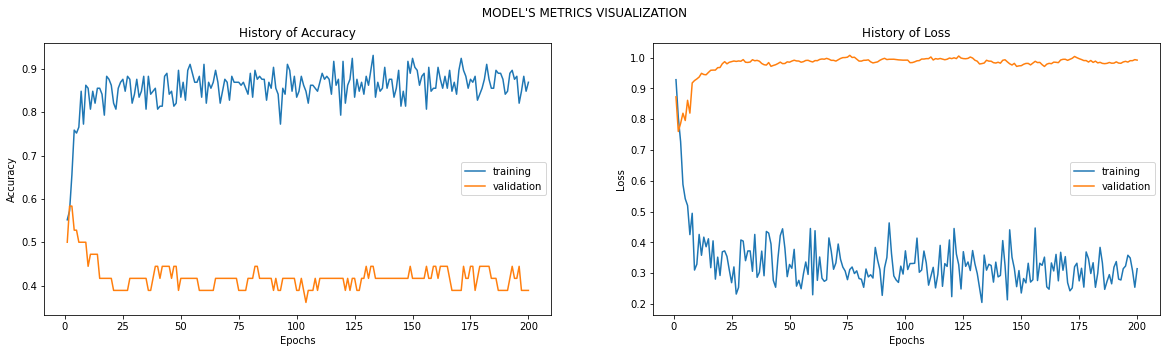

In [45]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    

    plt.show()
    
import matplotlib.pyplot as plt
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
              )

In [119]:
model=build_model()
model.compile(optimizer = 'rmsprop',                 # 加速神经网络
        loss = 'categorical_crossentropy',   # 损失函数
        metrics = ['accuracy'], )

model.fit(Data_1,Label_1,batch_size=5,epochs=20,validation_split=0.2,callbacks=[reduce_lr])

Epoch 1/20
13/13 [==============================] - 2s 91ms/step - loss: 0.8964 - accuracy: 0.5692 - val_loss: 0.3448 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/20
13/13 [==============================] - 1s 77ms/step - loss: 0.7126 - accuracy: 0.6769 - val_loss: 0.5793 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 3/20
13/13 [==============================] - 1s 79ms/step - loss: 0.7380 - accuracy: 0.6308 - val_loss: 0.5952 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 4/20
13/13 [==============================] - 1s 79ms/step - loss: 0.6537 - accuracy: 0.6154 - val_loss: 0.5527 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 5/20
13/13 [==============================] - 1s 80ms/step - loss: 0.6482 - accuracy: 0.6769 - val_loss: 0.5227 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 6/20
13/13 [==============================] - 1s 79ms/step - loss: 0.5580 - accuracy: 0.7231 - val_loss: 0.5205 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 7/20
13/13 [==============================] - 1s 80ms/step - loss: 0.5